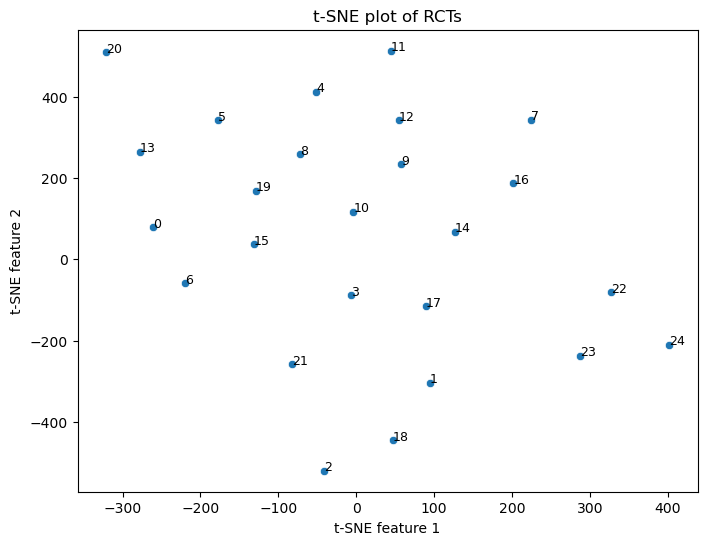

In [65]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Given data
data = {
    'Age': [40, 56, 39, 47, 38, 45, 49, 41, 48, 38, 46, 47, 43, 47, 49, 51, 50, 55, 44, 50, 80, 80, 81, 78, 73],
    'Blood Pressure': [120, 135, 112, 135, 111, 137, 128, 136, 116, 129, 134, 110, 122, 149, 144, 115, 144, 138, 115, 118, 166, 163, 163, 164, 157],
    'Cholesterol Level': [225, 202, 214, 211, 202, 190, 235, 199, 204, 200, 213, 177, 195, 196, 204, 218, 192, 210, 217, 209, 249, 251, 252, 244, 249],
    'Weight': [73, 63, 64, 80, 74, 68, 77, 74, 68, 73, 73, 72, 74, 69, 65, 76, 75, 79, 59, 69, 86, 93, 85, 96, 81],
    'BMI': [25, 30, 26, 29, 33, 31, 32, 28, 30, 28, 27, 33, 26, 31, 30, 33, 31, 33, 28, 29, 57, 45, 57, 51, 53],
    'Smoker': ['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No'],
    'Exercise': ['No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes'],
    'Diet': ['No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes']
}
df = pd.DataFrame(data)

# Preprocessing
categorical_features = ['Smoker', 'Exercise', 'Diet']
numerical_features = df.columns.difference(categorical_features)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

df_processed = preprocessor.fit_transform(df)

# t-SNE
tsne = TSNE(n_components=2, random_state=5, perplexity=12, learning_rate=200)
tsne_results = tsne.fit_transform(df_processed)

min_val = np.min(tsne_results)
max_val = np.max(tsne_results)

# Manual Min-Max scaling
tsne_results_scaled = (tsne_results - min_val) / (max_val - min_val)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1])

# Label each point with its column index
for i, point in enumerate(tsne_results):
    plt.text(point[0], point[1], str(i), fontsize=9)

plt.title('t-SNE plot of RCTs')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()


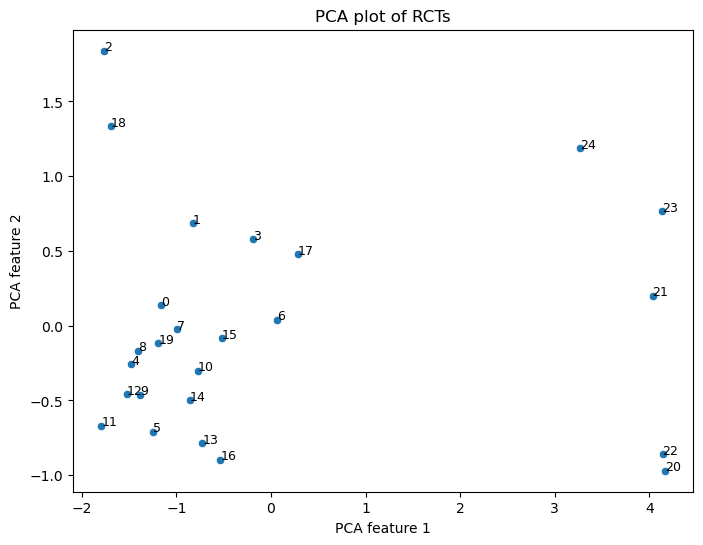

In [64]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Given data
data = {
    'Age': [40, 56, 39, 47, 38, 45, 49, 41, 48, 38, 46, 47, 43, 47, 49, 51, 50, 55, 44, 50, 80, 80, 81, 78, 73],
    'Blood Pressure': [120, 135, 112, 135, 111, 137, 128, 136, 116, 129, 134, 110, 122, 149, 144, 115, 144, 138, 115, 118, 166, 163, 163, 164, 157],
    'Cholesterol Level': [225, 202, 214, 211, 202, 190, 235, 199, 204, 200, 213, 177, 195, 196, 204, 218, 192, 210, 217, 209, 249, 251, 252, 244, 249],
    'Weight': [73, 63, 64, 80, 74, 68, 77, 74, 68, 73, 73, 72, 74, 69, 65, 76, 75, 79, 59, 69, 86, 93, 85, 96, 81],
    'BMI': [25, 30, 26, 29, 33, 31, 32, 28, 30, 28, 27, 33, 26, 31, 30, 33, 31, 33, 28, 29, 57, 45, 57, 51, 53],
    'Smoker': ['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No'],
    'Exercise': ['No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes'],
    'Diet': ['No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes']
}

df = pd.DataFrame(data)

# Preprocessing
categorical_features = ['Smoker', 'Exercise', 'Diet']
numerical_features = df.columns.difference(categorical_features)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

df_processed = preprocessor.fit_transform(df)

# t-SNE
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_processed)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1])

# Label each point with its column index
for i, point in enumerate(pca_result):
    plt.text(point[0], point[1], str(i), fontsize=9)

plt.title('PCA plot of RCTs')
plt.xlabel('PCA feature 1')
plt.ylabel('PCA feature 2')
plt.show()


In [60]:
import numpy as np
import numpy as np

mean = 50
sd = 5
size = 5

numbers = np.random.normal(mean, sd, size).tolist()
rounded_numbers = [round(num) for num in numbers]
print(rounded_numbers)


n = 25
pi = 0.25

choices = np.random.choice(['Yes', 'No'], size=n, p=[pi, 1-pi]).tolist()
print(choices)



[57, 45, 57, 51, 53]
['Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes']
